In [165]:
# analyze output from netpyne-optuna hyperparameter tuning
import optuna
import os
from optuna.visualization import plot_contour
from optuna.visualization import plot_edf
from optuna.visualization import plot_optimization_history
from optuna.visualization import plot_param_importances
from optuna.visualization import plot_rank
from optuna.visualization import plot_slice
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#plotly
import plotly.io as pio

In [166]:
tuning_run = 19  # which tuning run to analyze
data_dir = f'C:/Users/jjudge3/Desktop/scratch/S1_Thal_NetPyNE_Frontiers_2022/optuna/tune_run{tuning_run}/S1_Thal_NetPyNE_Frontiers_2022/data/optuna_tuning/'


In [167]:

storage_url = f"sqlite:///{data_dir}optuna_tuning_storage.db"
study_name = "optuna_tuning"  # or whatever `batch.batchLabel` was

study = optuna.load_study(study_name=study_name, storage=storage_url)

In [168]:
study

In [169]:
trials = study.trials
print("Number of trials: ", len(trials))
# Access details of a specific trial, e.g., the best trial
best_trial = study.best_trial
print("Best trial:", best_trial)
print(f"Best trial value: {best_trial.value}")
print(f"Best trial parameters: {best_trial.params}")

Number of trials:  10
Best trial: FrozenTrial(number=8, state=TrialState.COMPLETE, values=[2.553731609513985], datetime_start=datetime.datetime(2025, 10, 30, 12, 57, 18, 371140), datetime_complete=datetime.datetime(2025, 10, 30, 13, 23, 13, 133457), params={'propVelocity': 11.909201011689674, 'partial_blockade_fraction': 0.023646776112998414}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'propVelocity': FloatDistribution(high=150.0, log=False, low=0.0, step=None), 'partial_blockade_fraction': FloatDistribution(high=0.05, log=False, low=0.0, step=None)}, trial_id=9, value=None)
Best trial value: 2.553731609513985
Best trial parameters: {'propVelocity': 11.909201011689674, 'partial_blockade_fraction': 0.023646776112998414}


In [170]:
try:
    plot_param_importances(study)
except Exception as e:
    print(f"Could not plot parameter importances: {e}")

In [171]:
# visualization

#plot_optimization_history(study): Shows the objective value over the course of the optimization,
#        helping to understand convergence.
#plot_parallel_coordinate(study): Visualizes high-dimensional parameter relationships, showing 
#        how different parameter combinations lead to different objective values.
#plot_contour(study): Creates contour plots to visualize the relationship between two hyperparameters
#        and the objective value.
#plot_slice(study): Displays individual hyperparameters as slice plots, showing the distribution of 
#        objective values for different ranges of a single hyperparameter.
#plot_param_importances(study): Visualizes the importance of each hyperparameter in influencing the
#        objective value.
#plot_intermediate_values(study): Visualizes the learning curves of trials, particularly useful for
#        understanding the impact of pruning.

plot_optimization_history(study)

In [172]:
plot_contour(study)

In [173]:
plot_slice(study)

In [174]:
plot_edf(study)

In [175]:
plot_rank(study)

In [176]:
# read in fitness_components_trialX.json files to see how each component (latency err, hw err, ratio err) changed over trials
import json
import re
import matplotlib.pyplot as plt

fit_comp = {'trial': [], 'err_ratio': [], 'err_latency': [], 'err_hw': [], 
            'sim_ratio_mean': [], 'sim_latency_mean': [], 'sim_hw_mean': [], 
            'exp_ratio_mean': [], 'exp_latency_mean': [], 'exp_hw_mean': []}

for file in os.listdir(data_dir):
    if file.startswith('fitness_components_trial') and file.endswith('.json'):
        trial_num = int(re.search(r'trial(\d+)', file).group(1))
        with open(os.path.join(data_dir, file), 'r') as f:
            data = json.load(f)
            print(f"Trial {trial_num}: {data}")
            fit_comp['trial'].append(trial_num)
            fit_comp['err_ratio'].append(data['err_ratio'])
            fit_comp['err_latency'].append(data['err_latency'])
            fit_comp['err_hw'].append(data['err_hw'])
            fit_comp['sim_ratio_mean'].append(data['sim_ratio_mean'])
            fit_comp['sim_latency_mean'].append(data['sim_latency_mean'])
            fit_comp['sim_hw_mean'].append(data['sim_hw_mean'])
            fit_comp['exp_ratio_mean'].append(data['exp_ratio_mean'])
            fit_comp['exp_latency_mean'].append(data['exp_latency_mean'])
            fit_comp['exp_hw_mean'].append(data['exp_hw_mean'])

Trial 0: {'err_ratio': 0.48869023702602116, 'err_latency': 0.5683594130249208, 'err_hw': 33.096418365330685, 'sim_ratio_mean': 2.0123993042609154, 'sim_latency_mean': 4.985327817199445, 'sim_hw_mean': 16.377977502125383, 'exp_ratio_mean': 1.2354, 'exp_latency_mean': 3.5624, 'exp_hw_mean': 4.3623}
Trial 1: {'err_ratio': 0.044854427715719625, 'err_latency': 3.17649644997712, 'err_hw': 1.7625740541352042, 'sim_ratio_mean': 1.0, 'sim_latency_mean': 0.19848101265822787, 'sim_hw_mean': 7.135182398579861, 'exp_ratio_mean': 1.2354, 'exp_latency_mean': 3.5624, 'exp_hw_mean': 4.3623}
Trial 2: {'err_ratio': 0.044854427715719625, 'err_latency': 0.6102701109432416, 'err_hw': 32.953605850395356, 'sim_ratio_mean': 1.0, 'sim_latency_mean': 5.036857948950801, 'sim_hw_mean': 16.35202538472753, 'exp_ratio_mean': 1.2354, 'exp_latency_mean': 3.5624, 'exp_hw_mean': 4.3623}
Trial 3: {'err_ratio': 0.044854427715719625, 'err_latency': 2.4785221866493523, 'err_hw': 0.0326320697040652, 'sim_ratio_mean': 1.0, 'si

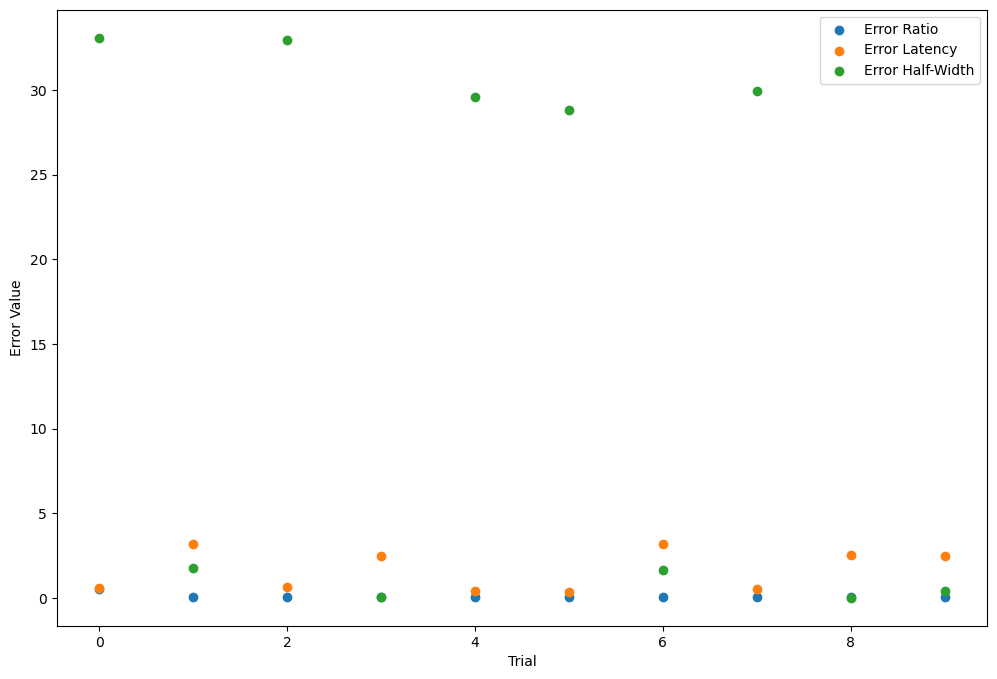

In [177]:
# plot the three error components over trials
plt.figure(figsize=(12, 8))
plt.scatter(fit_comp['trial'], fit_comp['err_ratio'], label='Error Ratio')
plt.scatter(fit_comp['trial'], fit_comp['err_latency'], label='Error Latency')
plt.scatter(fit_comp['trial'], fit_comp['err_hw'], label='Error Half-Width')
plt.xlabel('Trial')
plt.ylabel('Error Value')
plt.legend()
plt.show()

In [198]:
best_trial_num = 3 # best_trial.number
# open all_cells_rec_acsf_trial{best_trial_num}.npy and all_cells_rec_nbqx_trial{best_trial_num}.npy to see voltage traces
with open(os.path.join(data_dir, f"all_cells_rec_acsf_trial{best_trial_num}.npy"), 'rb') as f:
    all_cells_rec_acsf = np.load(f)
with open(os.path.join(data_dir, f"all_cells_rec_nbqx_trial{best_trial_num}.npy"), 'rb') as f:
    all_cells_rec_nbqx = np.load(f)

# open processed_traces_acsf_trial{best_trial_num}.pkl and processed_traces_nbqx_trial{best_trial_num}.pkl
with open(os.path.join(data_dir, f"processed_traces_acsf_trial{best_trial_num}.pkl"), 'rb') as f:
    acsf_processed_traces = pickle.load(f)
with open(os.path.join(data_dir, f"processed_traces_nbqx_trial{best_trial_num}.pkl"), 'rb') as f:
    nbqx_processed_traces = pickle.load(f)

print(all_cells_rec_acsf.shape)  # (num_timepoints, width, height)
print(all_cells_rec_nbqx.shape)  # (num_timepoints, width, height)


(999, 100, 100)
(999, 100, 100)


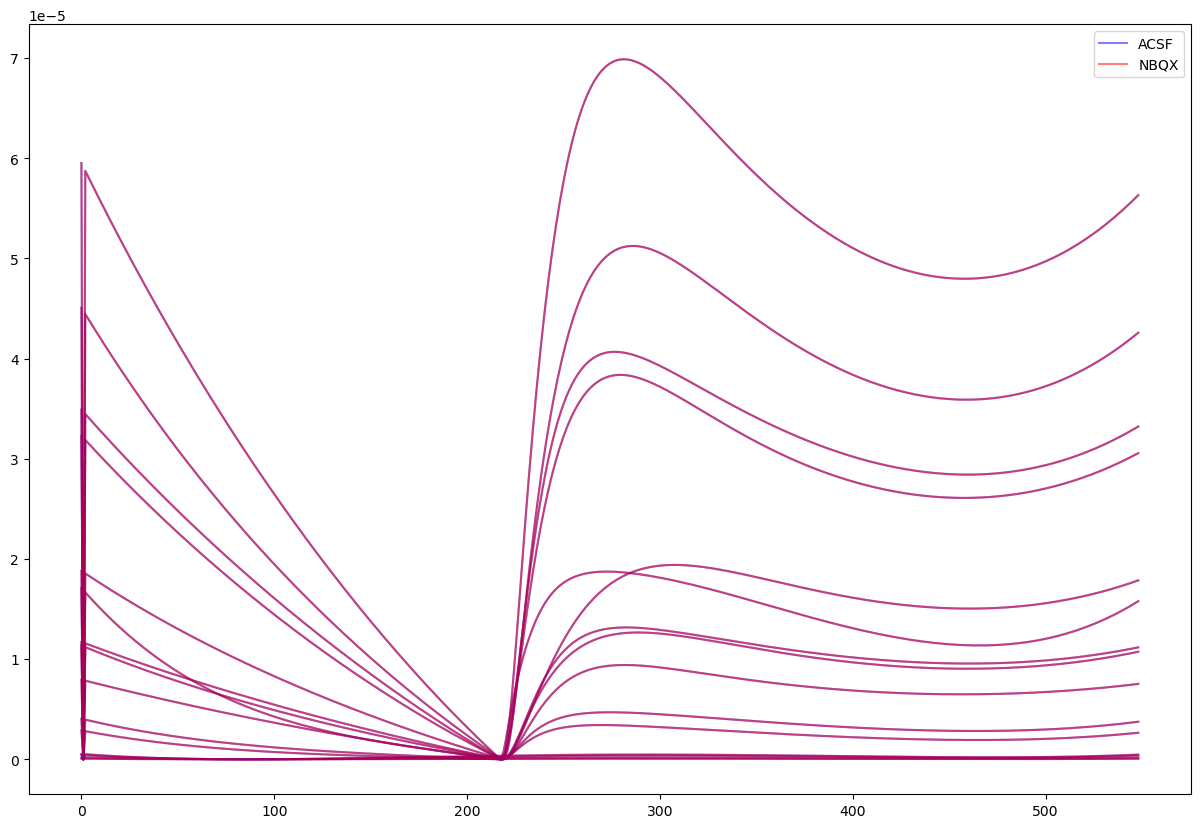

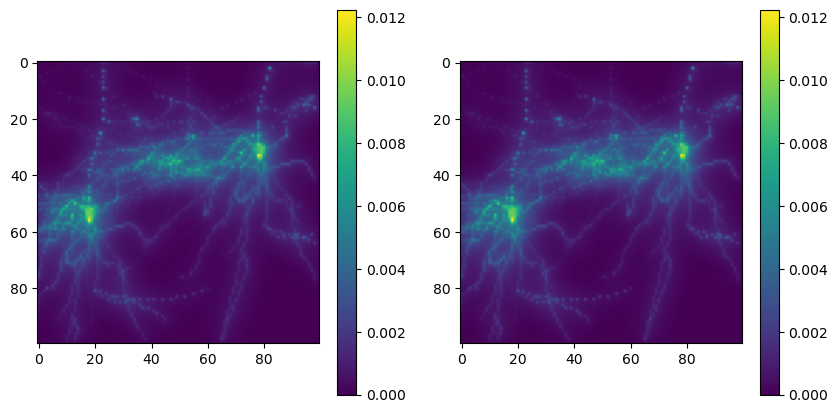

In [199]:

# plot some example voltage traces from the camera view
plt.figure(figsize=(15, 10))
num_traces = 15
offset = 0#.0001
for i in range(num_traces):
    plt.plot(acsf_processed_traces[i], label='ACSF', color='blue', alpha=0.5)
    plt.plot(nbqx_processed_traces[i], label='NBQX', color='red', alpha=0.5)
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend([handles[0], handles[-1]], [labels[0], labels[-1]]) # only first and last labels in legend
plt.show()

# imshow a frame from the camera view
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
im_acsf = np.average(all_cells_rec_acsf[:, :, :], axis=0)
min_val = np.min(im_acsf)
max_val = np.max(im_acsf)
plt.imshow(im_acsf, cmap='viridis', vmin=min_val, vmax=max_val)
plt.colorbar()
plt.subplot(1, 2, 2)
im_nbqx = np.average(all_cells_rec_nbqx[:, :, :], axis=0)
min_val = np.min(im_nbqx)
max_val = np.max(im_nbqx)
plt.imshow(im_nbqx, cmap='viridis', vmin=min_val, vmax=max_val)
plt.colorbar()
plt.show()

In [200]:
# open all_cells_rec_acsf and all_cells_rec_nbqx to see voltage traces before processing
with open(os.path.join(data_dir, f"all_cells_rec_acsf_trial{best_trial_num}.npy"), 'rb') as f:
    all_cells_rec_acsf = np.load(f)

with open(os.path.join(data_dir, f"all_cells_rec_nbqx_trial{best_trial_num}.npy"), 'rb') as f:
    all_cells_rec_nbqx = np.load(f)

print(all_cells_rec_acsf.shape)  # (num_timepoints, width, height)
print(all_cells_rec_nbqx.shape)  # (num_timepoints, width, height)

(999, 100, 100)
(999, 100, 100)


In [201]:
def intersect(roi1, roi2):
    # roi = (x1, y1, x2, y2)
    x1_min, y1_min, x1_max, y1_max = roi1
    x2_min, y2_min, x2_max, y2_max = roi2

    if (x1_min >= x2_max) or (x2_min >= x1_max):
        return False
    if (y1_min >= y2_max) or (y2_min >= y1_max):
        return False
    return True

cam_params = {
    'cam_width': all_cells_rec_acsf.shape[1],
    'cam_height': all_cells_rec_acsf.shape[2],
}
rois_to_sample = []
roi_size = 3  # 3x3 pixel ROIs
n_rois = 300
# randomly sample 60 non-overlapping ROIs of size 3x3 pixels
np.random.seed(4321)
for _ in range(n_rois):
    attempts = 10
    while True:
        x = np.random.randint(0, cam_params['cam_width'] - roi_size)
        y = np.random.randint(0, cam_params['cam_height'] - roi_size)
        roi = (x, y, x + roi_size, y + roi_size)
        if not any(intersect(roi, r) for r in rois_to_sample):
            rois_to_sample.append(roi)
            break
        attempts -= 1
        if attempts == 0:
            print("Could not find non-overlapping ROI after 10 attempts, stopping ROI selection.")



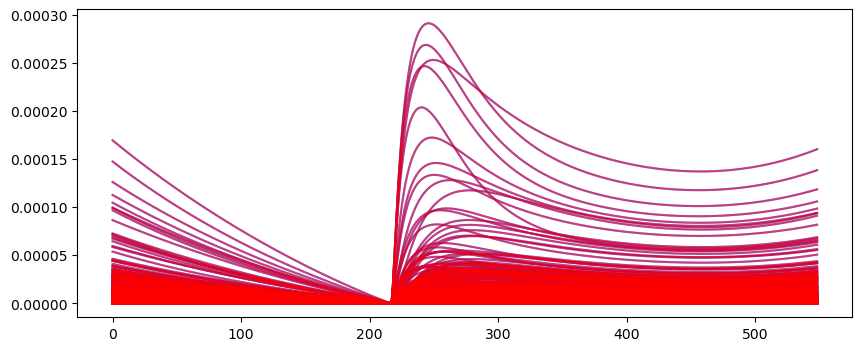

In [202]:
from measure_properties import TraceProperties

start_time = 450
plt.figure(figsize=(10, 4))
for i, all_cells_rec in enumerate([all_cells_rec_acsf, all_cells_rec_nbqx]):
    for roi in rois_to_sample:
        x_min, y_min, x_max, y_max = roi
        pixel_id = f"pixel_{x_min}_{y_min}"
        tr = np.average(all_cells_rec[:, x_min:x_max, y_min:y_max], axis=(1,2))

        # process
        x_ = np.arange(tr.shape[0])[start_time:]
        y = tr[start_time:]
        # exclusion window: [510, 700]
        exclusion_mask = (x_ < 500) | (x_ > 800)
        coeffs = np.polyfit(x_[exclusion_mask], y[exclusion_mask], 3)
        trend = np.polyval(coeffs, np.arange(tr.shape[0]))
        tr = tr - trend
        tr = -tr[start_time:]  # only analyze from start_time onward, and invert
        tr -= np.min(tr)  # baseline to 0

        #if np.max(tr) < 0.0002:
        #    continue
        plt.plot(tr, label=pixel_id if i == 0 else "", 
                 color='blue' if i == 0 else 'red', alpha=0.5)
plt.show()